In [7]:
import csv
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pandas as pd
import scipy

(9000, 1)
(9000,)


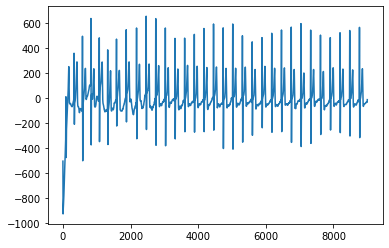

In [2]:
data = sio.loadmat('training/'+'train_ecg_00002'+'.mat')
signal = data['val'].T
print(signal.shape)
signal = np.ravel(signal)
print(signal.shape)
plt.plot(signal) 
plt.show()

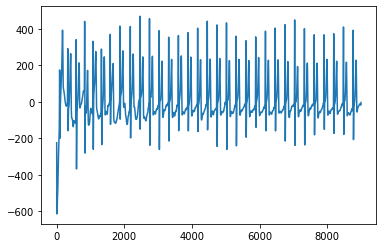

In [3]:
#clean the signal with neurokit ecg_clean
fs = 300
signal_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
plt.plot(signal_cleaned) 
plt.show()

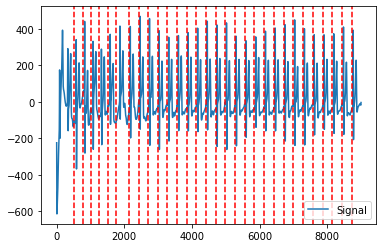

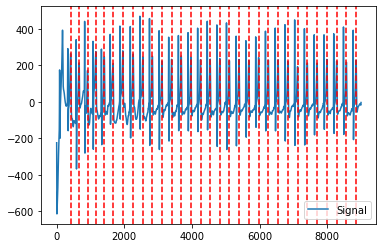

In [4]:
#detect peaks
_, rpeaks = nk.ecg_peaks(signal_cleaned, sampling_rate=fs)
signals, waves = nk.ecg_delineate(signal_cleaned, rpeaks, sampling_rate=fs)
nk.events_plot(waves["ECG_P_Peaks"], signal_cleaned);
nk.events_plot(waves["ECG_T_Peaks"], signal_cleaned);

C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexit

(1, 72)
(1, 73)


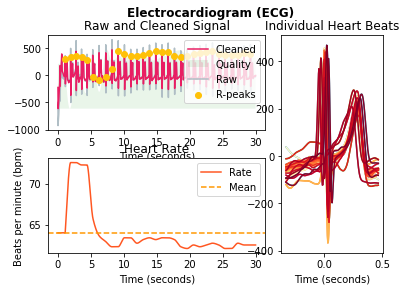

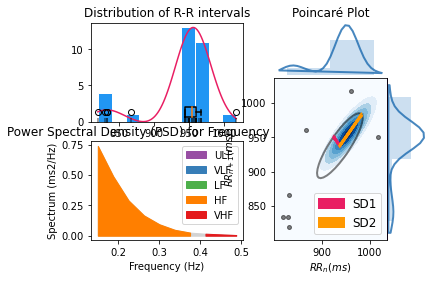

In [72]:
#using the processing of neurokit#
signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
nk.ecg_plot(signals, sampling_rate=fs, show_type='default') 
analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
peaks, info = nk.ecg_peaks(signal, sampling_rate=fs)
hrv_indices = nk.hrv(peaks,sampling_rate=fs, show=True)
print(hrv_indices.shape)
print(analyzed.shape)

{'ECG_P_Peaks': [307,
  nan,
  1173,
  1341,
  nan,
  1669,
  nan,
  1984,
  nan,
  nan,
  2796,
  2920,
  3048,
  3219,
  3377,
  nan,
  3693,
  3847,
  4029,
  4206,
  4393,
  nan,
  4717,
  4879,
  nan,
  5225,
  nan,
  5538,
  nan,
  5841,
  nan,
  6140,
  6454,
  6641,
  6813,
  nan,
  7180,
  nan,
  7536,
  7714,
  7865,
  8060,
  8239,
  8391,
  nan,
  8711,
  9029,
  9210,
  9372,
  9510,
  9704,
  9886,
  10072,
  10251,
  nan,
  nan,
  nan,
  nan,
  11157,
  11329,
  11468,
  11799,
  11964,
  12145,
  12304,
  12432,
  12787,
  nan,
  13109,
  13306,
  13466,
  nan,
  13847,
  14008,
  14174,
  14343,
  14499,
  14671,
  14814,
  14988,
  15117,
  15301,
  15455,
  15595,
  nan,
  15936,
  nan,
  16333,
  16500,
  16684,
  16858,
  17038,
  17197,
  17354,
  17531,
  17678,
  17839],
 'ECG_P_Onsets': [300,
  nan,
  1166,
  1326,
  nan,
  1667,
  nan,
  1982,
  nan,
  nan,
  2789,
  2875,
  3044,
  3216,
  3375,
  nan,
  3674,
  3835,
  4023,
  4184,
  4375,
  nan,
  4687,
  

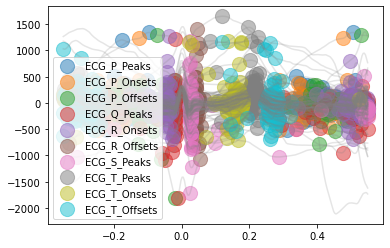

In [310]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=fs)
signal_dwt, waves_dwt = nk.ecg_delineate(signal, rpeaks, sampling_rate=fs, method="dwt", show=True, show_type='all')
waves_dwt

In [181]:
#using all features of ecg_analyze
dataFrame = pd.DataFrame();

signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
analyzed.head
analyzed['TYPE'] = "A"
PQframe=pd.DataFrame(PQ, index=[0])
pd.concat([analyzed,PQframe], axis=1)
analyzed.head

c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:486: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `windows` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\timen\Anaconda3\envs\KIMed\lib\site-packages\neurokit2\complexity\entropy_multiscale.py:202: RuntimeWarning: invalid value encountered in double_scalars
  mse = np.trapz(mse) / len(mse)


<bound method NDFrame.head of    ECG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0       64.01005  937.666667  44.833878         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD  ...  HRV_ShanEn  \
0         NaN         NaN         NaN  17.573055  ...    3.257426   

   HRV_FuzzyEn  HRV_MSE  HRV_CMSE  HRV_RCMSE    HRV_CD   HRV_HFD   HRV_KFD  \
0     0.465767      NaN       NaN        NaN  0.593065  1.142019  1.190573   

    HRV_LZC  TYPE  
0  0.981378     A  

[1 rows x 74 columns]>

In [137]:
index_Q_Peaks = np.where(signals['ECG_Q_Peaks'].values == 1)[0]
index_T_Peaks = np.where(signals['ECG_T_Peaks'].values == 1)[0]
index_S_Peaks = np.where(signals['ECG_S_Peaks'].values == 1)[0]
index_R_Peaks = np.where(signals['ECG_R_Peaks'].values == 1)[0]
index_P_Peaks = np.where(signals['ECG_P_Peaks'].values == 1)[0]
index_P_Onsets = np.where(signals['ECG_P_Onsets'].values == 1)[0]
index_T_Onsets = np.where(signals['ECG_T_Onsets'].values == 1)[0]

signal_len = len(signals['ECG_Raw'])

PQ = calcFeaturesFromPeaks(index_P_Peaks, index_Q_Peaks, signal_len, 'PQ')
PR = calcFeaturesFromPeaks(index_P_Peaks, index_R_Peaks, signal_len, 'PR')
PS = calcFeaturesFromPeaks(index_P_Peaks, index_S_Peaks, signal_len, 'PS')
PT = calcFeaturesFromPeaks(index_P_Peaks, index_T_Peaks, signal_len, 'PT')
QR = calcFeaturesFromPeaks(index_Q_Peaks, index_R_Peaks, signal_len, 'QR')
QS = calcFeaturesFromPeaks(index_Q_Peaks, index_S_Peaks, signal_len, 'QS')
QT = calcFeaturesFromPeaks(index_Q_Peaks, index_T_Peaks, signal_len, 'QT')
RS = calcFeaturesFromPeaks(index_R_Peaks, index_S_Peaks, signal_len, 'RS')
RT = calcFeaturesFromPeaks(index_R_Peaks, index_T_Peaks, signal_len, 'RT')
ST = calcFeaturesFromPeaks(index_S_Peaks, index_T_Peaks, signal_len, 'ST')

RdP = calcPeakRelationStatistic(index_P_Peaks, index_R_Peaks, signals['ECG_Clean'], True, 'RdP')
RdQ = calcPeakRelationStatistic(index_Q_Peaks, index_R_Peaks, signals['ECG_Clean'], True, 'RdQ')
RdT = calcPeakRelationStatistic(index_R_Peaks, index_T_Peaks, signals['ECG_Clean'], False, 'RdT')
RdS = calcPeakRelationStatistic(index_R_Peaks, index_S_Peaks, signals['ECG_Clean'], False, 'RdS')

PStat = calcPeakStatistic(index_P_Peaks,signals['ECG_Clean'], 'PStat')
RStat = calcPeakStatistic(index_R_Peaks,signals['ECG_Clean'], 'RStat')
SStat = calcPeakStatistic(index_S_Peaks,signals['ECG_Clean'], 'SStat')
QStat = calcPeakStatistic(index_Q_Peaks,signals['ECG_Clean'], 'QStat')
TStat = calcPeakStatistic(index_T_Peaks,signals['ECG_Clean'], 'TStat')
print(PStat, RStat, RStat, QStat, TStat)

{'PStatMean': -25.598653416958566, 'PStatMin': -103.53539198925031, 'PStatMax': 59.151835356943465, 'PStatStd': 26.64203304137559, 'PStatSkew': -0.004950523211627348, 'PStatKurt': 3.910236552973669} {'RStatMean': 329.1577417933782, 'RStatMin': -94.95532937759877, 'RStatMax': 455.42893711528154, 'RStatStd': 139.71454103336558, 'RStatSkew': -2.0122884815447186, 'RStatKurt': 2.878876580331098} {'RStatMean': 329.1577417933782, 'RStatMin': -94.95532937759877, 'RStatMax': 455.42893711528154, 'RStatStd': 139.71454103336558, 'RStatSkew': -2.0122884815447186, 'RStatKurt': 2.878876580331098} {'QStatMean': -84.48684189179397, 'QStatMin': -124.53706968090847, 'QStatMax': -24.42125788321396, 'QStatStd': 42.06993684971777, 'QStatSkew': 0.3371169524666565, 'QStatKurt': -1.5633080501279257} {'TStatMean': 231.09583088091745, 'TStatMin': 170.80713409917732, 'TStatMax': 278.39079732612123, 'TStatStd': 21.72775368295601, 'TStatSkew': -0.20128726749419085, 'TStatKurt': 0.7866853925980797}


In [70]:
def calcPeakStatistic(indexes_1,signal, name):
    return calcStatisticalFeatures(signal[indexes_1], name)

In [71]:
def calcPeakRelationStatistic(indexes_1, indexes_2, signal, inverse, name):
    return calcStatisticalFeatures(amplitudeOfPeak(indexes_1, indexes_2, signal, inverse), name)

In [72]:
def amplitudeOfPeak(indexes_1, indexes_2, signal, inverse=False):
    #indexes_1 is the leading signal event
    amplitude = []
    for i in range(len(indexes_1)):
        current_index = indexes_1[i]
        if(indexes_1[-1] == indexes_1[i]):
            next_index = len(signal) - 1
        else:
            next_index = indexes_1[i+1]
        pos_indexes = np.where((indexes_2 >= current_index) & (indexes_2 <= next_index))
        pos_indexes = pos_indexes[0]
        if not(len(pos_indexes) == 0):
            relation = signal[indexes_2[pos_indexes[0]]]/(signal[current_index]+1e12)
            if(inverse):
                relation = 1/relation
            amplitude.append(relation)
    return amplitude

In [73]:
def calcDiff(indexes_1, indexes_2, signal_len):
    #indexes_1 is the leading signal event
    diff_list = []
    for i in range(len(indexes_1)):
        current_index = indexes_1[i]
        if(indexes_1[-1] == indexes_1[i]):
            next_index = signal_len - 1
        else:
            next_index = indexes_1[i+1]
        pos_indexes = np.where((indexes_2 >= current_index) & (indexes_2 <= next_index))
        pos_indexes = pos_indexes[0]
        if not(len(pos_indexes) == 0):
            diff = indexes_2[pos_indexes[0]]-current_index
            diff_list.append(diff)
    return diff_list

In [74]:
def calcFeaturesFromPeaks(indexes_1, indexes_2, signal_len,name):
    return calcStatisticalFeatures(calcDiff(indexes_1, indexes_2, signal_len),name)   

In [75]:
def calcStatisticalFeatures(data, name):
    name = str(name)
    if(len(data) > 0):
        mean = np.mean(data)
        min  = np.min(data)
        max  = np.max(data)
        std  = np.std(data)
        skewness = scipy.stats.skew(data)
        kurtosis = scipy.stats.kurtosis(data)
    else:
        mean = np.nan
        min = np.nan
        max = np.nan
        std = np.nan
        skewness = np.nan
        kurtosis = np.nan
    return {name+'Mean':mean, name+'Min':min, name+'Max':max, name+'Std':std, name+'Skew':skewness, name+'Kurt':kurtosis}

In [76]:
def ownFeatures(signals):
    index_Q_Peaks = np.where(signals['ECG_Q_Peaks'].values == 1)[0]
    index_T_Peaks = np.where(signals['ECG_T_Peaks'].values == 1)[0]
    index_S_Peaks = np.where(signals['ECG_S_Peaks'].values == 1)[0]
    index_R_Peaks = np.where(signals['ECG_R_Peaks'].values == 1)[0]
    index_P_Peaks = np.where(signals['ECG_P_Peaks'].values == 1)[0]
    index_P_Onsets = np.where(signals['ECG_P_Onsets'].values == 1)[0]
    index_T_Onsets = np.where(signals['ECG_T_Onsets'].values == 1)[0]

    signal_len = len(signals['ECG_Raw'])

    PQ = calcFeaturesFromPeaks(index_P_Peaks, index_Q_Peaks, signal_len, 'PQ')
    PR = calcFeaturesFromPeaks(index_P_Peaks, index_R_Peaks, signal_len, 'PR')
    PS = calcFeaturesFromPeaks(index_P_Peaks, index_S_Peaks, signal_len, 'PS')
    PT = calcFeaturesFromPeaks(index_P_Peaks, index_T_Peaks, signal_len, 'PT')
    QR = calcFeaturesFromPeaks(index_Q_Peaks, index_R_Peaks, signal_len, 'QR')
    QS = calcFeaturesFromPeaks(index_Q_Peaks, index_S_Peaks, signal_len, 'QS')
    QT = calcFeaturesFromPeaks(index_Q_Peaks, index_T_Peaks, signal_len, 'QT')
    RS = calcFeaturesFromPeaks(index_R_Peaks, index_S_Peaks, signal_len, 'RS')
    RT = calcFeaturesFromPeaks(index_R_Peaks, index_T_Peaks, signal_len, 'RT')
    ST = calcFeaturesFromPeaks(index_S_Peaks, index_T_Peaks, signal_len, 'ST')

    RdP = calcPeakRelationStatistic(index_P_Peaks, index_R_Peaks, signals['ECG_Clean'], True, 'RdP')
    RdQ = calcPeakRelationStatistic(index_Q_Peaks, index_R_Peaks, signals['ECG_Clean'], True, 'RdQ')
    RdT = calcPeakRelationStatistic(index_R_Peaks, index_T_Peaks, signals['ECG_Clean'], False, 'RdT')
    RdS = calcPeakRelationStatistic(index_R_Peaks, index_S_Peaks, signals['ECG_Clean'], False, 'RdS')

    PStat = calcPeakStatistic(index_P_Peaks,signals['ECG_Clean'], 'PStat')
    RStat = calcPeakStatistic(index_R_Peaks,signals['ECG_Clean'], 'RStat')
    SStat = calcPeakStatistic(index_S_Peaks,signals['ECG_Clean'], 'SStat')
    QStat = calcPeakStatistic(index_Q_Peaks,signals['ECG_Clean'], 'QStat')
    TStat = calcPeakStatistic(index_T_Peaks,signals['ECG_Clean'], 'TStat')

    return pd.DataFrame({**PQ, **PR, **PS, **PT, **QR, **QS, **QT, **RS, **RT, **ST, **RdP, **RdQ, **RdT, **RdS, **PStat, **QStat, **RStat, **SStat, **TStat}, index=[0])
    

In [168]:
dict1 = {'Tim':0}
dict2 = {'MArk':2}
{**dict1, **dict2}

{'Tim': 0, 'MArk': 2}

In [174]:
ownFeatures(signals)

,PQMean,PQMin,PQMax,PQStd,PQSkew,PQKurt,PRMean,PRMin,PRMax,PRStd,...,SStatMax,SStatStd,SStatSkew,SStatKurt,TStatMean,TStatMin,TStatMax,TStatStd,TStatSkew,TStatKurt
0,186.0,40,332,146.0,0.0,-2.0,39.678571,26,65,9.016071,...,-30.113641,57.798962,-0.237402,1.959127,231.095831,170.807134,278.390797,21.727754,-0.201287,0.786685


In [10]:
import warnings
warnings.filterwarnings('ignore')
fs = 300 
analyzed_list = []
with open('training/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if(row[1]=='N' or row[1]=='A'):
            data = sio.loadmat('training/'+row[0]+'.mat')   # Import der EKG-Dateien
            signal = data['val'][0]
            try:
                signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
                analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
                analyzed = pd.concat([analyzed,ownFeatures(signals)], axis=1)
                type(analyzed)
                analyzed['TYPE'] = ''
                if row[1]=='N':
                    analyzed['TYPE'] = 'N'        # Zuordnung zu "Normal"
                if row[1]=='A':
                    analyzed['TYPE'] = 'A'             # Zuordnung zu "Vorhofflimmern"

                if analyzed['TYPE'].values[0]:
                    analyzed_list.append(analyzed)
            except:
                print(line_count)
            line_count = line_count + 1
df = pd.concat(analyzed_list, axis=0)



195
477
524
591
640
843
964
1048
1307
1366
1402
1491
1496
1531
2005
2034
2128
2223
2464
2501
2527
2970
2978
3040
3057
3162
3168
3304
3309
3414
3448
3471
3512
3528
3623
3793


In [81]:
import warnings
warnings.filterwarnings('ignore')
count = 23958
fs = 300 
analyzed_list = []
with open('ProcessedData/MIT-AtrialFibrillation/REFERENCE.csv') as csv_file:      # Einlesen der Liste mit Dateinamen und Zuordnung
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if((row[1]=='N' or row[1]=='A') and line_count%4 == 0):
            data = sio.loadmat('ProcessedData/MIT-AtrialFibrillation/'+row[0]+'.mat')   # Import der EKG-Dateien
            signal = data['val'][0]
            try:
                signals, info = nk.ecg_process(signal, sampling_rate=fs, method='neurokit')
                analyzed = nk.ecg_analyze(signals, sampling_rate=fs)
                analyzed = pd.concat([analyzed,ownFeatures(signals)], axis=1)
                
                analyzed['TYPE'] = ''
                if row[1]=='N':
                    analyzed['TYPE'] = 'N'        # Zuordnung zu "Normal"
                if row[1]=='A':
                    analyzed['TYPE'] = 'A'             # Zuordnung zu "Vorhofflimmern"

                if analyzed['TYPE'].values[0]:
                    analyzed_list.append(analyzed)
            except:
                print(line_count)
        line_count = line_count + 1
       
df_mit = pd.concat(analyzed_list, axis=0)

152
160
276
376
460
552
596
656
792
852
956
996
1116
1144
1152
1236
1264
1480
1596
1624
1712
1716
1720
1764
1800
1864
1888
2028
2112
2160
2184
2200
2260
2324
2464
2604
2624
2656
2704
2800
2872
2960
2980
3008
3020
3172
3176
3276
3296
3304
3308
3344
3360
3380
3424
3480
3800
4052
4056
4124
4136
4140
4252
4304
4420
4448
4452
4632
4744
4844
4856
4880
4908
4928
4980
5004
5052
5088
5144
5148
5160
5172
5268
5280
5292
5396
5712
5716
5732
5812
5916
6068
6120
6192
6468
6480
6584
6592
6664
6684
6700
6704
6776
6792
7128
7148
7168
7432
7440
7612
7640
7772
7796
7884
7896
7908
8012
8124
8200
8268
8404
8436
8476
8568
8588
8624
8680
8704
8956
8988
9084
9116
9144
9152
9172
9196
9208
9232
9320
9332
9364
9492
9516
9604
9616
9672
9688
9772
9780
9860
9872
10072
10128
10144
10216
10224
10232
10236
10260
10288
10312
10324
10332
10416
10420
10448
10472
10504
10524
10532
10548
10600
10616
10644
10712
10844
10852
10888
10904
10920
10952
10964
10972
10980
11068
11112
11184
11200
11260
11380
11484
11632
11684
11772

In [82]:
df_mit.to_pickle('./MIT_Dataset.pkl')

In [46]:
df_mit = pd.read_pickle('./MIT_Dataset.pkl')

In [53]:
testdata = pd.read_pickle('./testdata.pkl')


In [66]:
row = df.iloc[0]
row.to_pickle('./base_dataframe.pkl')

In [67]:
base_dataframe = pd.read_pickle('./base_dataframe.pkl')

In [89]:
names_list = df.columns.to_list()

In [88]:
df.columns
df.drop('TYPE', axis=1, inplace=True)

In [93]:
names_list
len(names_list)
with open('dfnames.pkl','wb') as target:
    pickle.dump(names_list, target)

In [118]:
with open('dfnames.pkl','rb') as target:
    names_list = pickle.load(target)
test = testdata.columns.to_list()
test1 = df_mit.columns.to_list()
test2 = df.columns.to_list()
removed = [x for x in test if x not in test1]
removed2 = [x for x in test1 if x not in test]
frame1 = df.iloc[0].to_frame().T
frame2 = df_mit.iloc[0].to_frame()
frame3 = pd.concat([frame1,testdata], names=names_list, axis=0)
print(frame1.info)
print(frame3.info)
print(frame3[names_list].iloc[0].to_frame().T)
with open('dftemplate.pkl','wb') as target:
    pickle.dump(frame3[names_list].iloc[0].to_frame().T, target)

<bound method DataFrame.info of    ECG_Rate_Mean   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      58.230248  1039.404762  231.21624         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...   TStatMin   TStatMax  \
0         NaN         NaN         NaN  212.201861  ...  20.527115  91.125308   

    TStatStd  TStatSkew  TStatKurt  HRV_DFA_alpha2  HRV_DFA_alpha2_ExpRange  \
0  16.990687   -0.18713  -0.548308             NaN                      NaN   

   HRV_DFA_alpha2_ExpMean  HRV_DFA_alpha2_DimRange  HRV_DFA_alpha2_DimMean  
0                     NaN                      NaN                     NaN  

[1 rows x 192 columns]>
<bound method DataFrame.info of    ECG_Rate_Mean   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      58.230248  1039.404762  231.21624         NaN         NaN         NaN   
0      62.563878   959.195402   52.82988         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNN

In [117]:
with open('dftemplate.pkl','rb') as target:
    dftest=pickle.load(target)
print(dftest)

   ECG_Rate_Mean   HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      58.230248  1039.404762  231.21624         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5   HRV_RMSSD  ...   TStatMin   TStatMax  \
0         NaN         NaN         NaN  212.201861  ...  20.527115  91.125308   

    TStatStd  TStatSkew  TStatKurt  HRV_DFA_alpha2  HRV_DFA_alpha2_ExpRange  \
0  16.990687   -0.18713  -0.548308             NaN                      NaN   

   HRV_DFA_alpha2_ExpMean  HRV_DFA_alpha2_DimRange  HRV_DFA_alpha2_DimMean  
0                     NaN                      NaN                     NaN  

[1 rows x 192 columns]


In [12]:
import pickle
#df.to_pickle('./Neurokit_Dataset.pkl')

In [45]:
import pickle
df = pd.read_pickle('./Neurokit_Dataset.pkl')
df_mit = pd.read_pickle('./MIT_Dataset.pkl')
df_train = df

In [46]:
df_train = pd.concat([df,df_mit],axis=0)
df_shuffled = df_train.sample(frac=1).reset_index(drop=True)
df_shuffled.info
df_train = df_shuffled

In [47]:
df_train = df_train.replace('N', 0)
df_train = df_train.replace('A', 1)
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)


In [48]:
numtyp0 = len(df_train[df_train['TYPE']==0]['TYPE'])
numtyp1 = len(df_train[df_train['TYPE']==1]['TYPE'])

weight = numtyp0 / numtyp1
print(weight)

3.0630782169890662


In [5]:
correlation = df.corr()
correlation = correlation['TYPE']
print(correlation.to_string())

ECG_Rate_Mean              0.457491
HRV_MeanNN                -0.347755
HRV_SDNN                   0.274709
HRV_SDANN1                      NaN
HRV_SDNNI1                      NaN
HRV_SDANN2                      NaN
HRV_SDNNI2                      NaN
HRV_SDANN5                      NaN
HRV_SDNNI5                      NaN
HRV_RMSSD                  0.335730
HRV_SDSD                   0.333469
HRV_CVNN                   0.446846
HRV_CVSD                   0.511722
HRV_MedianNN              -0.394098
HRV_MadNN                  0.413784
HRV_MCVNN                  0.576699
HRV_IQRNN                  0.345607
HRV_pNN50                  0.625069
HRV_pNN20                  0.503470
HRV_HTI                    0.475110
HRV_TINN                   0.086969
HRV_ULF                         NaN
HRV_VLF                         NaN
HRV_LF                     0.191661
HRV_HF                     0.314499
HRV_VHF                    0.416589
HRV_LFHF                  -0.155001
HRV_LFn                   -0

In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [57]:
classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators = 500, seed =123, scale_pos_weight =weight)

In [51]:
y_comp = df_train['TYPE']
X_comp = df_train.drop('TYPE', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=99, shuffle=True)

In [8]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic', 'binary:hinge', 'binary_logitraw'],
#               'learning_rate': [0.05, 0.2, 0.3,0.5], #so called `eta` value
#               'max_depth': [3,5,7,9,13,17,20],
#               'min_child_weight': [5,10,15,20,40],
#               'silent': [1],
#               'subsample': [0.3,0.5,0.7],
#               'colsample_bytree': [0.3,0.5,0.7,1],
#               'n_estimators': [5,10,30,100], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [1337]}


 {'colsample_bytree': 0.4,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 7,
 'missing': -999,
 'n_estimators': 12,
 'nthread': 4,
 'objective': 'binary:hinge',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.9}
{'booster': 'dart',
 'colsample_bytree': 0.3,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 8,
 'missing': -999,
 'n_estimators': 13,
 'nthread': 4,
 'objective': 'binary:hinge',
 'seed': 1337,
 'silent': 1,
 'subsample': 1}
 {'booster': 'dart',
 'colsample_bytree': 0.3,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 8,
 'missing': -999,
 'n_estimators': 13,
 'nthread': 4,
 'objective': 'binary:hinge',
 'seed': 1337,
 'silent': 1,
 'subsample': 1}


In [53]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:hinge'],
              'learning_rate': [0.2], #so called `eta` value
              'max_depth': [8],
              'min_child_weight': [20],
              'silent': [1],
              'subsample': [0.5],
              'colsample_bytree': [0.3],
              'n_estimators': [13], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'booster':['dart'],
              'seed': [1337]}

In [58]:


clf = GridSearchCV(classifier, parameters, n_jobs=5, 
                   cv=3,
                   scoring='f1_micro',
                   verbose=2, refit=True)

clf.fit(X_train,y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[01:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=5,
             p

In [59]:
classifier = clf.best_estimator_
clf.best_params_

{'booster': 'dart',
 'colsample_bytree': 0.3,
 'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 20,
 'missing': -999,
 'n_estimators': 13,
 'nthread': 4,
 'objective': 'binary:hinge',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.5}

In [56]:
classifier.fit(X_train,y_train)

[01:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scale_pos_weight", "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=20,
              missing=-999, monotone_constraints='()', n_estimators=13,
              n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:hinge', predictor='auto', random_state=1337, ...)

In [60]:
predict = classifier.predict(X_test)
accuracy= float(np.sum(predict==y_test))/y_test.shape[0]
print(accuracy)

0.9756854630108639


In [64]:
classifier.save_model('xgboost.json')

67
mit
0.5257672158490562
0.5536912751677853
[[147  49]
 [ 84  18]]


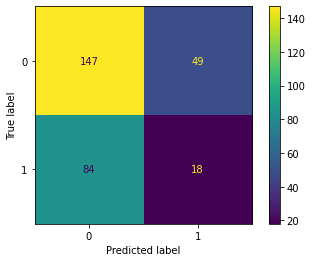

In [69]:
import utilz
from sklearn.metrics import ConfusionMatrixDisplay
f1, acc,cm = utilz.predictions_score('./ProcessedData/MIT_AF_val/REFERENCE.csv','./PREDICTIONS.csv')
print('mit')
print(f1)
print(acc)
print(cm)
cm = ConfusionMatrixDisplay(cm)
cm.plot()

[[695  30]
 [ 16  73]]
0.7604166666666665


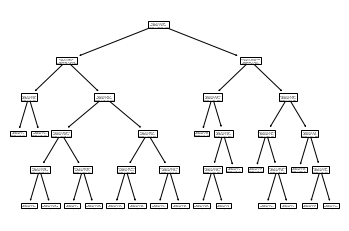

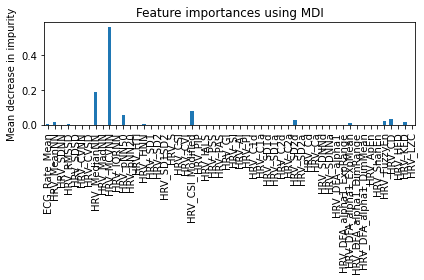

In [308]:
y_comp = df_totest['TYPE']
X_comp = df_totest[features]
X_train, X_test, y_train, y_test = train_test_split(X_comp, y_comp, test_size=0.2, random_state=99)

dt = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99, max_depth=5)#, max_features=10, class_weight='balanced')
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

tree.plot_tree(dt)
plt.show()

tree_importances = pd.Series(dt.feature_importances_, index=features)

fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

[[706  24]
 [  5  79]]
0.8449197860962567


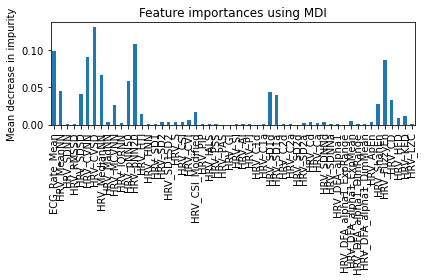

In [296]:
dt = RandomForestClassifier(n_estimators=10, min_samples_split=20, random_state=99, max_depth=5, max_features=10)
dt.fit(X_train, y_train)

predicted = dt.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

tree_importances = pd.Series(dt.feature_importances_, index=features)

fig, ax = plt.subplots()
tree_importances.plot.bar( ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
svm = svm.SVC()


In [297]:
import pickle

In [299]:
filname = 'modelTim.sav'
pickle.dump(dt,open(filname,'wb'))

In [300]:
load_model = pickle.load(open(filname, 'rb'))

In [302]:
predicted = load_model.predict(X_test)
print(confusion_matrix(predicted, y_test))
print(f1_score(predicted, y_test))

[[706  24]
 [  5  79]]
0.8449197860962567
